## Projek Prediksi Harga Stok Saham BajFinance : Time Series Analysis Using ARIMA🤨 🧐 

### 1. Business Understanding 😇 
Projek kali ini saya tertarik untuk mengeksplorasi prediksi harga stok saham BajFinance menggunakan data dari tahun 2000 hingga 2020. Seperti yang kita ketahui, harga saham merupakan informasi yang sangat berharga dalam dunia keuangan 💰💼. Sebagai seorang data scientist, saya ingin membantu investor dan analis pasar untuk memperkirakan perilaku harga saham BajFinance di masa mendatang.

Dengan menggunakan teknik machine learning, saya akan membuat model untuk memprediksi pergerakan harga saham. Hal ini akan memberikan wawasan yang berharga kepada para investor dalam pengambilan keputusan investasi mereka. Kita akan memanfaatkan dataset historis harga saham BajFinance sebagai bahan pelatihan model kita.

Tujuan akhir dari projek ini adalah memberikan prediksi yang akurat mengenai harga saham BajFinance di masa depan, sehingga investor dapat membuat keputusan investasi yang lebih baik. Whats goood Letsgo! 💪📈'


### 2. Data Understanding 😁
'Dataset ini berisikan 5 ribu data mengenai perdagangan saham BAJFINANCE selama periode 2000-2020. Setiap data merekam informasi tentang harga pembukaan, harga penutupan, harga tertinggi, dan harga terendah saham BAJFINANCE pada hari itu. Selain itu, dataset ini juga mencatat rata-rata harga saham berdasarkan volume perdagangan (VWAP), jumlah saham yang diperdagangkan, nilai total transaksi dalam mata uang tertentu, serta informasi tentang jumlah perdagangan dan jumlah saham yang dikirimkan secara fisik. Dengan menggunakan dataset ini, analis pasar dapat mengidentifikasi tren harga, volume perdagangan, serta mengembangkan model prediksi untuk memperkirakan perilaku pasar saham BAJFINANCE di masa mendatang.'

 Dataset tersebut berisikan fitur:
- Date: Tanggal transaksi saham.
- Symbol: Simbol saham.
- Series: Jenis seri saham (misalnya, EQ untuk ekuitas).
- Prev Close: Harga penutupan saham sebelumnya.
- Open: Harga pembukaan saham pada hari itu.
- High: Harga tertinggi saham pada hari itu.
- Low: Harga terendah saham pada hari itu.
- Last: Harga terakhir yang tercatat untuk hari itu.
- Close: Harga penutupan saham pada hari itu.
- VWAP (Volume Weighted Average Price): Rata-rata harga saham berdasarkan volume perdagangan. (Dependent)
- Volume: Jumlah saham yang diperdagangkan.
- Turnover: Nilai total transaksi dalam mata uang tertentu.
- Trades: Jumlah perdagangan yang terjadi.
- Deliverable Volume: Jumlah saham yang dikirimkan secara fisik.
- %Deliverble: Persentase dari volume saham yang dikirimkan secara fisik.


### 3. Data Preparation: 
- Cleaning data
- Feature Engineering 😢
- Stationarity Checking
- Making Time Series Data --> Stationary


### 4. Modelling 😨 😰
- ARIMA
- Auto ARIMA

### 5. Evaluation 🧐 🤓 😎
- MSE
- MAE

In [1]:
!pip install pmdarima

In [2]:
from pyforest import *
import warnings


import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [3]:
folder_path = 'C:/Users/ASUS/kode/projek/stok_harga/'
os.listdir(folder_path)
df= pd.read_csv(os.path.join(folder_path, 'BAJFINANCE.csv'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.50,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.90,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.60,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.10,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.00,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5065,2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,3.526895e+15,339815.0,1498309.0,0.1520
5066,2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,2.444958e+15,213994.0,944373.0,0.1417
5067,2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,1.674361e+15,162374.0,387513.0,0.0840
5068,2020-08-28,BAJFINANCE,EQ,3632.50,3650.00,3688.00,3617.05,3672.05,3670.80,3652.77,4251575,1.553003e+15,137033.0,434147.0,0.1021


#### Data Wrangling & Plotting

In [5]:
# set indeks karena kita fokus ke data timeseries
df.set_index('Date', inplace=True)

Sehingga ketika kita bikin Date itu menjadi index maka kita sepertinya nggak mungkin pakai train_test_split

<Axes: xlabel='Date'>

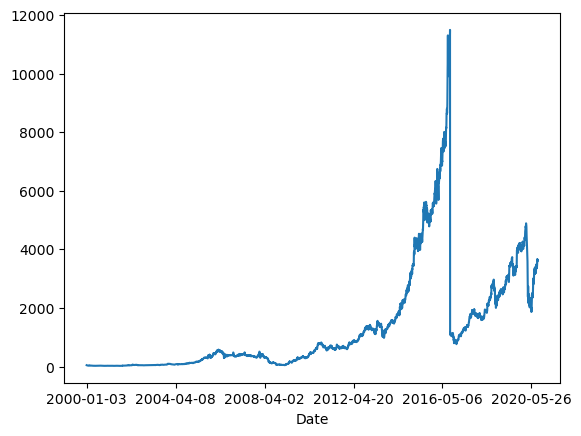

In [6]:
df['VWAP'].plot()

#### Stationary Checking

#### Merupakan data tidak stasioner (sifat statistiknya tidak berubah secara signifikan dari waktu ke waktu)
Dikarenakan time series. Jika pada variabel target kita diplot, dan ternyata harganya itu seperti mengalami kenaikan pada suatu waktu tertentu artinya ada semacam Season atau Musim dimana harga saham naik. Maka dari itu kita perlu terapin feature engineering untuk mengetahui lebih dalam mengenai musim tersebut.

In [7]:
df.shape

(5070, 14)

In [8]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

Dikarenakan tidak terlalu banyak data yang null yaitu 446 dan 2779 pada tiga fitur terakhir tersebut. Mungkin akan cocok jika kita drop saja record data tersebut. Saya tidak mengisi dengan mean dikarenakan datanya cukup banyak jika ingin diisi. Selain itu jika kita lihat baris datanya dan berdasarkan plot, perbedaan harga dari awal-awal tahun 2000 sampai dengan tahun 2016 sangat tinggi perbedaannya. Sehingga mengisi NaN dengan mean/median/dll mungkin tidak terlalu cocok.

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [11]:
df.shape

(2291, 14)

In [12]:
data = df.copy()
data.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2291 entries, 2011-06-01 to 2020-08-31
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              2291 non-null   object 
 1   Series              2291 non-null   object 
 2   Prev Close          2291 non-null   float64
 3   Open                2291 non-null   float64
 4   High                2291 non-null   float64
 5   Low                 2291 non-null   float64
 6   Last                2291 non-null   float64
 7   Close               2291 non-null   float64
 8   VWAP                2291 non-null   float64
 9   Volume              2291 non-null   int64  
 10  Turnover            2291 non-null   float64
 11  Trades              2291 non-null   float64
 12  Deliverable Volume  2291 non-null   float64
 13  %Deliverble         2291 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 268.5+ KB


In [14]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [15]:
# fungsi untuk cek apakah suatu data/fitur itu statisioner
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

stasioneritas merupakan sifat di mana statistik dasar deret waktu seperti rata-rata dan varians tidak berubah secara signifikan dari waktu ke waktu.

ADF itu cara uji statistik yang digunakan untuk menentukan apakah suatu deret waktu memiliki akar satuan (unit root), yang menunjukkan bahwa deret waktu tersebut tidak stasioner

In [16]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [17]:
adfuller_test(data['VWAP'])

ADF Test Statistic : -2.8567752582428656
p-value : 0.05061028668842635
#Lags Used : 0
Number of Observations Used : 2290
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [18]:
check_stationarity(data['VWAP'])

The series is NOT stationary


#### Making Time Series Data

#### lagging feature
adalah nilai-nilai dari suatu variabel yang diambil pada waktu sebelumnya dalam rentang waktu tertentu. Tujuannya untuk menangkap pola atau tren dalam data yang bergantung pada nilai-nilai masa lalu.

#### past behaviour of prices 

In [19]:
lag_features = ['High','Low','Volume','Turnover','Trades']

#### relevansi
untuk menentukan lagging features itu kita perlu mengetahui knowledge di bidang tersebut. Dimana fitur-fitur ini biasanya digunakan dalam analisis keuangan dan sangat penting untuk memahami perilaku pasar keuangan. 'High' dan 'Low' mewakili harga tertinggi dan terendah dari sekuritas selama periode tertentu, 'Volume' mewakili jumlah total saham atau kontrak yang diperdagangkan, 'Turnover' mengacu pada nilai total sekuritas yang diperdagangkan selama periode tertentu, dan 'Trades' menunjukkan jumlah perdagangan yang dieksekus......

#### Indikator Likuiditas dan Volatilitas:
'Volume' dan 'Trades' adalah indikator likuiditas pasar, yang mencerminkan kemudahan sekuritas untuk dibeli atau dijual tanpa memengaruhi harganya secara signifikan. Harga 'High' dan 'Low' memberikan wawasan tentang volatilitas sekuritas, yang sangat penting untuk penilaian risiko dan strategi perdagangan.

#### Tampilan Komprehensif Aktivitas Pasar
Bersama-sama, fitur-fitur ini memberikan pandangan komprehensif tentang aktivitas pasar untuk sekuritas tertentu. Fitur-fitur ini menangkap informasi mengenai pergerakan harga, aktivitas perdagangan, dan partisipasi pasar, yang penting untuk berbagai tujuan analisis seperti analisis teknikal, manajemen risiko, dan perdagangan algoritmik...

In [20]:
window1 = 3
window2 = 7

misalkan dalam rentang periode 3 dan 7 hari (mencoba), nantinya model hasil prediksi (TP) itu hanya mampu memprediksi 7 hari kedepan dengan sangat baik, mungkin kita bisa mencoba 7 hari terlebih dulu aja.

In [21]:
for feature in lag_features:
    data[feature+'rolling_mean_3'] = data[feature].rolling(window=window1).mean()
    
    data[feature+'rolling_mean_7'] = data[feature].rolling(window=window2).mean()

In [22]:
for feature in lag_features:
    data[feature+'rolling_std_3'] = data[feature].rolling(window=window1).std()
    
    data[feature+'rolling_std_7'] = data[feature].rolling(window=window2).std()

In [23]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

### pemrosesan data yang tidak statisioner

#### Rolling & Shifting

Differencing (shifting) adalah teknik atau metode untuk membuat data menjadi stasioner

Sedangkan Rolling pada dasarnya digunakan untuk menghaluskan deret Waktu di mana kita dapat menggunakan berbagai teknik seperti moving average, moving median atau beberapa pendekatan berbeda tergantung pada data yang kita miliki.

Rolling sama seperti window bergulir 5 hari, window bergulir 6 hari, window bergulir 7 hari dan dapat dikatakan bahwa itu adalah window yang telah kita pertimbangkan untuk Moving average / median

Fitur-fitur hasil perulangan menggunakan rolling mean dan std tersebut itu akan sangat membantu dalam prediki target kita nantinya yaitu 'Rata-rata harga saham berdasarkan volume perdagangan' terhadap setiap harinya. Dikarenakan sudah mengubah datanya menjadi Stasioner dan siap. Artinya fitur tersebut menjadi variabel independent

In [24]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [25]:
# kita hapus aja data yang kosong
data.dropna(inplace=True)

In [26]:
independen_features = ['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [27]:
dataset = data.copy()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2285 entries, 2011-06-09 to 2020-08-31
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  2285 non-null   object 
 1   Series                  2285 non-null   object 
 2   Prev Close              2285 non-null   float64
 3   Open                    2285 non-null   float64
 4   High                    2285 non-null   float64
 5   Low                     2285 non-null   float64
 6   Last                    2285 non-null   float64
 7   Close                   2285 non-null   float64
 8   VWAP                    2285 non-null   float64
 9   Volume                  2285 non-null   int64  
 10  Turnover                2285 non-null   float64
 11  Trades                  2285 non-null   float64
 12  Deliverable Volume      2285 non-null   float64
 13  %Deliverble             2285 non-null   float64
 14  Highrolling_mean_3      2285 n

In [28]:
adfuller_test(dataset['VWAP'])

ADF Test Statistic : -2.856661111400353
p-value : 0.05062482081558306
#Lags Used : 0
Number of Observations Used : 2284
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [29]:
check_stationarity(dataset['VWAP'])

The series is NOT stationary


#### Plot ACF dan PACF

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

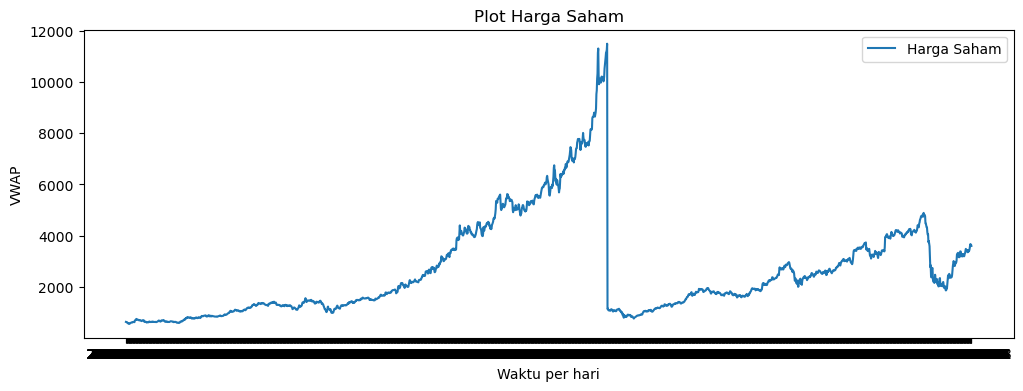

In [31]:
plt.figure(figsize= (12,4))
plt.plot(dataset['VWAP'], label = "Harga Saham")
plt.legend()
plt.title('Plot Harga Saham')
plt.xlabel("Waktu per hari")
plt.ylabel("VWAP")
plt.show();

## Arima Modelling
AR + I + MA

ARIMA --> (P, d, q)

AR	= Auto Regressive Model:
AR ini nantinya akan menghasilkan nilai dari P.
Untuk mencari P itu kita akan menggunakan PACF. PACF adalah Partial Auto Correlation Factor.

I	= Integrity / Diferencing:
I ini nantinya akan menghasilkan nilai dari d.
Untuk mencari D itu menggunakan konsep Differencing kita bisa mencari nilai d.

MA	= Moving Average:
MA ini nantinya akan menghasilkan nilai dari q.
Lalu untuk mencari nilai q itu kita bisa menggunakan konsep ACF atau Auto correlation Factor. 

Residual = Error

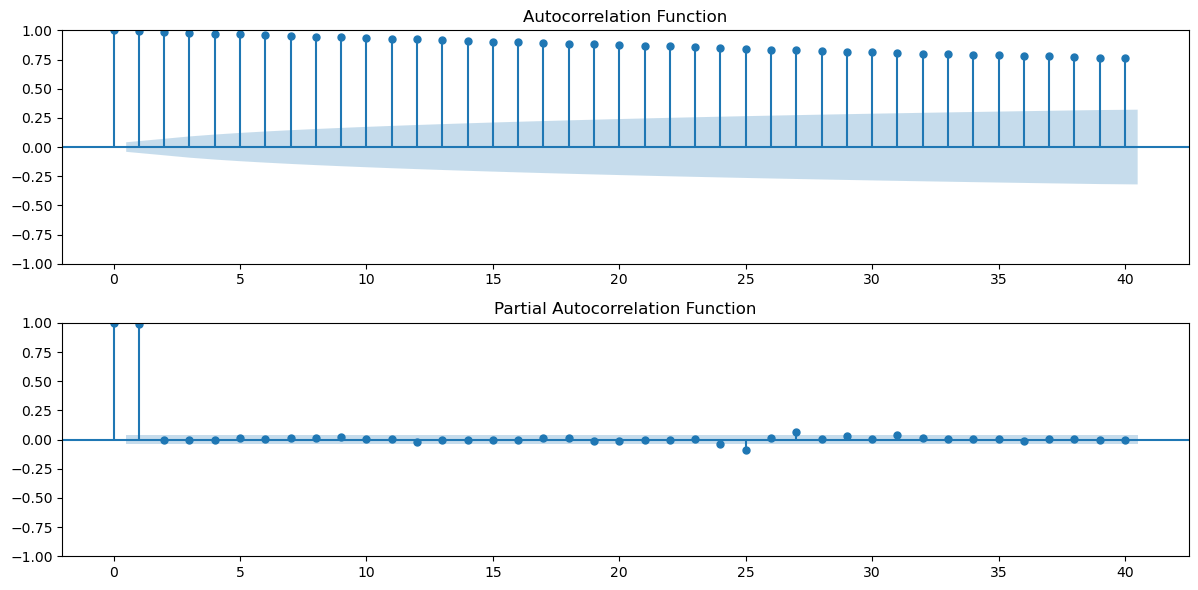

In [32]:

# plot ACF and PACF on initial given sales values:
# Create a 2x1 subplot grid
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 6))

# Plot Autocorrelation Function (ACF)
plot_acf(dataset['VWAP'], lags=40, ax=ax1)
ax1.set_title('Autocorrelation Function')

# Plot Partial Autocorrelation Function (PACF)
plot_pacf(dataset['VWAP'], lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation Function')

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

Berdasarkan hasil analisis dengan mencari nilai yang cocok (try and error berulang kali) terhadap nilai p, d, dan q aku masih bingung untuk nentuin nilainya. kita bisa coba auto arima dulu

In [33]:
# train = 80%
train_data = dataset[0:1800]
test_data = dataset[1800:]

In [67]:
train_data.shape

(1800, 34)

In [48]:
import pmdarima
print(pmdarima.__version__)

2.0.4


In [51]:
# implementasi auto arima dengan input data latih independen dan target
from pmdarima import auto_arima

# seharusnya pake parameter traace = True, tapi karena versi terbaru pmdarima itu udh automatis
# trace True itu artinya ingin mencari nilai (p, d, q) terbaik
model = auto_arima(y = train_data['VWAP'] , X = train_data[independen_features])

In [52]:
forecast = model.predict(n_periods=len(test_data), X = test_data[independen_features])

In [53]:
# karena arima sekarang terima array melalui pandas
test_data['Forecast_ARIMA'] = forecast.values

In [66]:
test_data.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7,Forecast_ARIMA
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-11,BAJFINANCE,EQ,2615.65,2621.00,2668.80,2562.25,2600.0,2600.75,2619.05,3357660,...,63.787942,56.544592,53.608580,1.130645e+06,816410.887112,2.905375e+14,2.170264e+14,40756.099335,32012.681782,2600.714852
2018-09-12,BAJFINANCE,EQ,2600.75,2617.95,2636.95,2516.10,2588.9,2594.00,2577.54,2682340,...,51.914260,40.110047,66.236890,9.025933e+05,835125.949241,2.325644e+14,2.156391e+14,31297.267202,34656.587966,2625.118143
2018-09-14,BAJFINANCE,EQ,2594.00,2630.50,2683.50,2626.25,2678.0,2672.20,2651.42,1795131,...,47.776811,55.315527,61.033875,7.836553e+05,800730.132185,2.018671e+14,2.036245e+14,31471.093038,33742.606344,2600.960885
2018-09-17,BAJFINANCE,EQ,2672.20,2660.00,2660.00,2588.25,2596.0,2604.60,2613.75,1455320,...,44.294307,55.950343,57.040858,6.335337e+05,818929.309318,1.593010e+14,2.094265e+14,35128.684296,34854.254176,2556.393581
2018-09-18,BAJFINANCE,EQ,2604.60,2610.00,2627.45,2559.00,2563.4,2570.40,2597.61,1449290,...,47.625517,33.719740,50.588419,1.979536e+05,780029.521271,5.634743e+13,2.006348e+14,10189.437390,32916.577887,2572.863698


<Axes: xlabel='Date'>

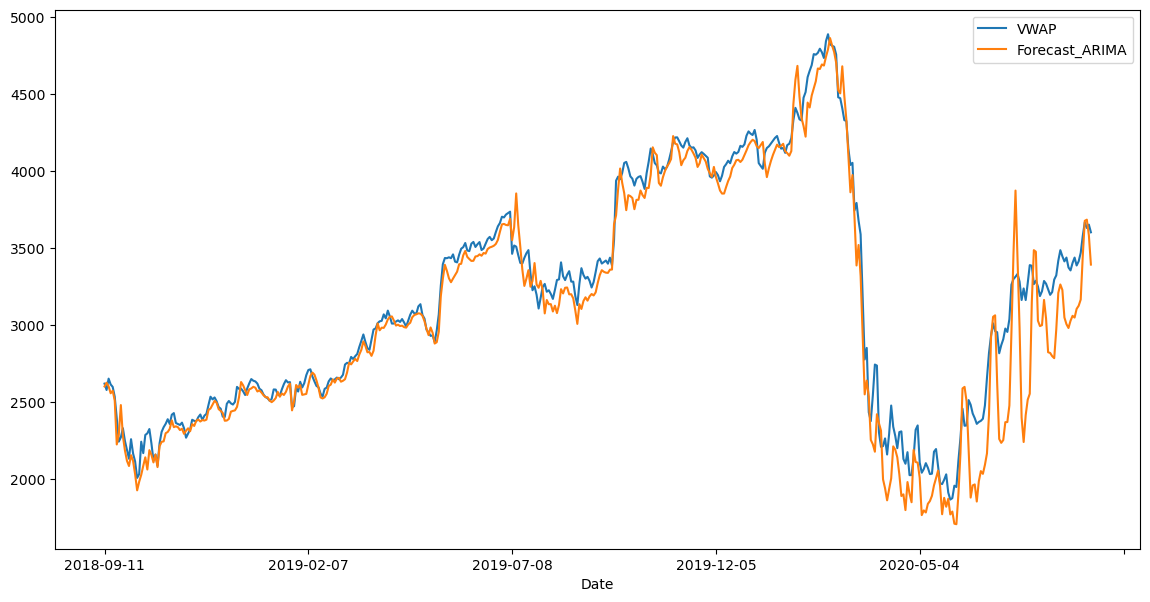

In [55]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

#### Memeriksa tren dari prediksi

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [61]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

<IPython.core.display.Javascript object>

187.79989085859174

In [62]:
mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA'])

124.668574373447

Berdasarkan hasil evaluasi dari nilai MSE dan MAE yang didapat, maka diketahui bahwa model prediksi menggunakan Auto ARIMA cukup baik dalam memprediksi harga saham pada suatu waktu tertentu. Hal ini dikarenakan nilai dari MSE dan MAE yang cukup kecil mengenai selisih nilai asli atau nilai VWAP ril terhadap nilai hasil prediksi.

In [ ]:
model.forecast()

In [68]:
import pickle

In [69]:
rute = 'C:/Users/ASUS/kode/projek/stok_harga/BAJFINANCE_prediction_Aarima.pkl'
with open(rute, 'wb') as files:
    pickle.dump(model,files)